In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

In [57]:
df = pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')

In [58]:
print(df.head())


                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

In [59]:
print("Initial data shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Initial data shape: (7050, 16)

Missing values:
 status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [60]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [62]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

df['status_published'] = pd.to_datetime(df['status_published'])

 #تحويل status_type إلى قيم رقمية (Label Encoding)

df['status_type'] = df['status_type'].map({'photo': 0, 'video': 1, 'status': 2, 'link': 3})

In [63]:
df = df.fillna(0)

In [64]:
df = df.drop_duplicates()

In [65]:
plt.figure(figsize=(12, 6))
df[['num_reactions', 'num_comments', 'num_shares']].boxplot()
plt.title('Boxplot ')
plt.savefig('boxplot_outliers.png')
plt.close()

In [66]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,1,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,1,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


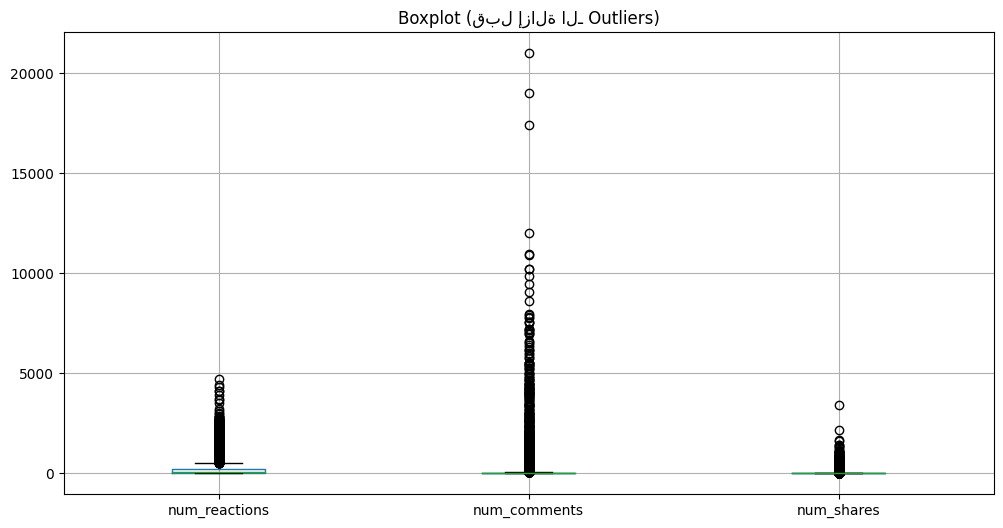

In [67]:
plt.figure(figsize=(12, 6))
df[features].boxplot()
plt.title('Boxplot (قبل إزالة الـ Outliers)')
plt.savefig('boxplot_outliers_before.png')
#plt.close()

In [68]:
def remove_outliers_zscore(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:
        z_scores = stats.zscore(df_clean[col])
        df_clean = df_clean[(z_scores < threshold) & (z_scores > -threshold)]
    return df_clean

df_clean = remove_outliers_zscore(df, features)

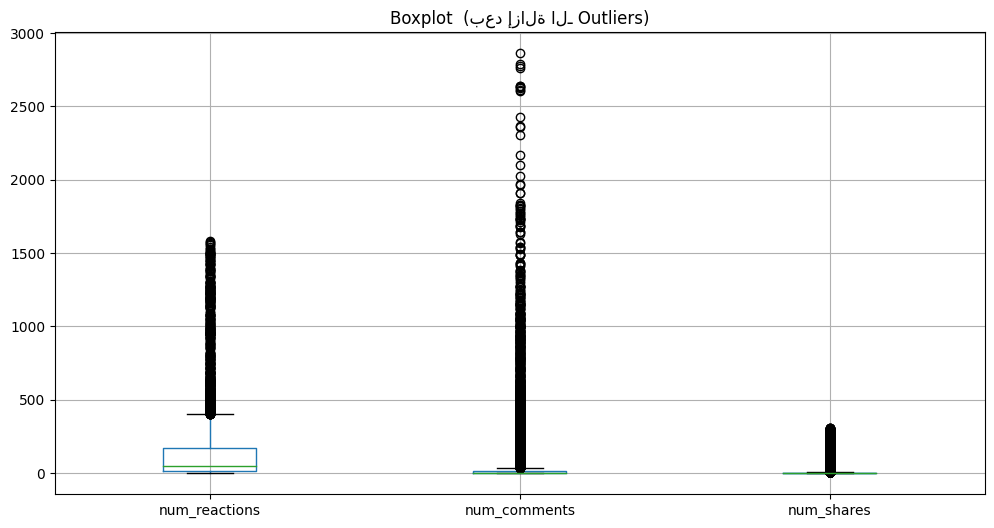

In [69]:
# رسم Boxplot بعد إزالة الـ Outliers
plt.figure(figsize=(12, 6))
df_clean[features].boxplot()
plt.title('Boxplot  (بعد إزالة الـ Outliers)')
plt.savefig('boxplot_outliers_after.png')
#plt.close()

In [70]:
features = ['num_reactions', 'num_comments', 'num_shares']
X = df[features].values

##Standardization للبيانات

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# heat map# 

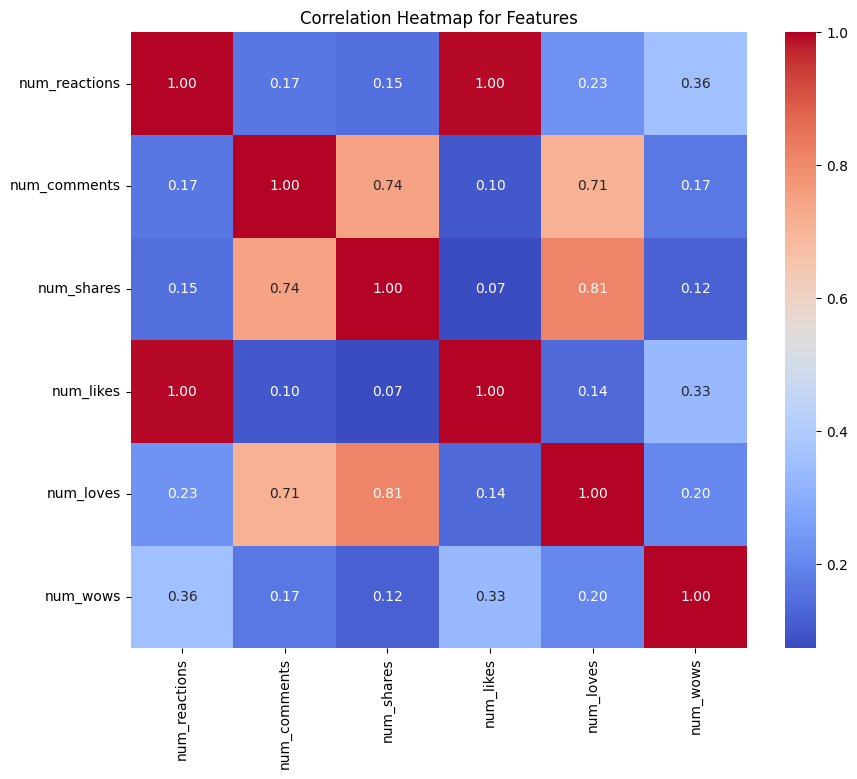

In [71]:
corr_features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']
corr_matrix = df_clean[corr_features].corr()

#رسم heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap for Features')
plt.savefig('correlation_heatmap.png')
#plt.close()


In [72]:
def kmeans(X, k, max_iters=100, random_seed=42):
    n_samples, n_features = X.shape
    

    np.random.seed(random_seed)
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # حساب المسافات (Euclidean Distance) 
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        old_centroids = centroids.copy()
        
        for i in range(k):
            if np.sum(labels == i) > 0: 
                centroids[i] = np.mean(X[labels == i], axis=0)
        
        if np.all(old_centroids == centroids):
            break
    
    # حساب WCSS 
    wcss = np.sum([np.sum(np.sqrt(((X[labels == i] - centroids[i])**2).sum(axis=1))**2) for i in range(k)])
    
    return labels, centroids, wcss

In [73]:
def calculate_wcss_stable(X, k, n_runs=10):
    wcss_runs = []
    for run in range(n_runs):
        _, _, wcss = kmeans(X, k, random_seed=42+run)
        wcss_runs.append(wcss)
    return np.min(wcss_runs)

# حساب WCSS لعدد Clusters  (Elbow Method)
wcss = []
k_values = range(1, 11)
for k in k_values:
    wcss.append(calculate_wcss_stable(X_scaled, k))
    print(f"تم حساب WCSS لـ K={k}")

تم حساب WCSS لـ K=1
تم حساب WCSS لـ K=2
تم حساب WCSS لـ K=3
تم حساب WCSS لـ K=4
تم حساب WCSS لـ K=5
تم حساب WCSS لـ K=6
تم حساب WCSS لـ K=7
تم حساب WCSS لـ K=8
تم حساب WCSS لـ K=9
تم حساب WCSS لـ K=10


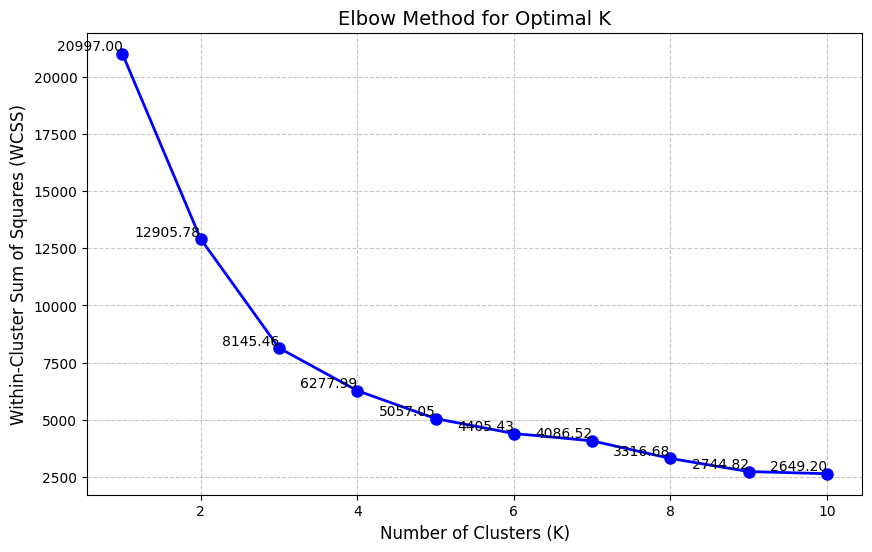

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
for i, (k, w) in enumerate(zip(k_values, wcss)):
    plt.text(k, w, f'{w:.2f}', fontsize=10, ha='right', va='bottom')
plt.savefig('elbow_plot_enhanced.png')
#plt.close()

In [75]:
optimal_k = 3
labels, centroids, _ = kmeans(X_scaled, optimal_k)
#Standardization) للرسم قبل
centroids_original = scaler.inverse_transform(centroids)

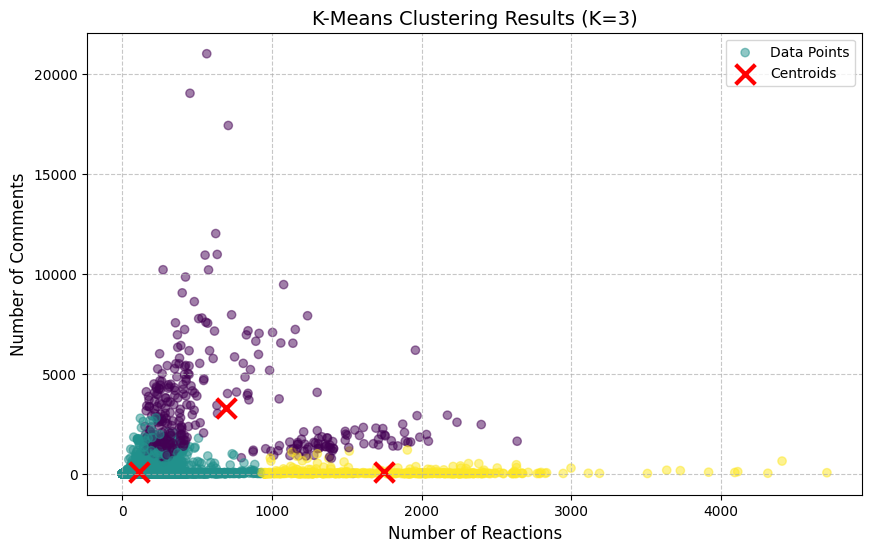

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Number of Reactions', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.title(f'K-Means Clustering Results (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('kmeans_results_enhanced.png')
#plt.close()

In [77]:
df['Cluster'] = labels
df.to_csv('Clustered_Live_Complete.csv', index=False)

# تحليل الـ Clusters
print("\n نتايج  Cluster:")
cluster_stats = df.groupby('Cluster')[features].mean()
print(cluster_stats)



 نتايج  Cluster:
         num_reactions  num_comments  num_shares
Cluster                                         
0           695.360656   3282.780328  507.373770
1           109.074655     86.912506   19.127278
2          1751.948052     75.480519   16.485714
